In [2]:
import pandas as pd
import numpy as np
import re

In [3]:
f=open('chatData.txt','r',encoding='utf-8')

In [4]:
data=f.read()

In [4]:
print(data)

26/08/24, 11:39 pm - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.
08/08/24, 3:24 pm - ~ ✨AJAY SINGH ✨ created group "Section A (unofficial)"
08/08/24, 3:24 pm - You were added
27/08/24, 9:34 am - +91 79830 61986 joined using this group's invite link
27/08/24, 9:34 am - +91 88245 37595 joined using this group's invite link
27/08/24, 10:34 am - ~ Ravi Kumar Gupta added ~ 😇😇😇😇😇 and +91 91993 23709
27/08/24, 12:13 pm - +91 96100 23020 joined using this group's invite link
28/08/24, 8:14 am - +91 63900 05858: 8.30 s hi lab hai
28/08/24, 8:22 am - +91 74140 88077: Kha aana hai
28/08/24, 8:23 am - +91 63900 05858: Basement m
28/08/24, 8:23 am - +91 74140 88077: Ok
28/08/24, 8:39 am - +91 70734 55143 joined using this group's invite link
28/08/24, 8:39 am - Rishabh Chaudhary: <Media omitted>
28/08/24, 8:39 am - Rishabh Chaudhary: <Media omitted>
28/08/24, 8:39 am - Rishabh Chaudhary: <Media omitted>


In [5]:
pattern='\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{1,2}\s(?:am|pm)\s-\s'

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\shish\AppData\Local\Temp\ipykernel_11852\1230028891.py:1: SyntaxWarning: invalid escape sequence '\d'
  pattern='\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{1,2}\s(?:am|pm)\s-\s'


In [6]:
messages=re.split(pattern,data)[1:]
len(messages)

1021

In [7]:
dates=re.findall(pattern,data)
dates

['26/08/24, 11:39\u202fpm - ',
 '08/08/24, 3:24\u202fpm - ',
 '08/08/24, 3:24\u202fpm - ',
 '27/08/24, 9:34\u202fam - ',
 '27/08/24, 9:34\u202fam - ',
 '27/08/24, 10:34\u202fam - ',
 '27/08/24, 12:13\u202fpm - ',
 '28/08/24, 8:14\u202fam - ',
 '28/08/24, 8:22\u202fam - ',
 '28/08/24, 8:23\u202fam - ',
 '28/08/24, 8:23\u202fam - ',
 '28/08/24, 8:39\u202fam - ',
 '28/08/24, 8:39\u202fam - ',
 '28/08/24, 8:39\u202fam - ',
 '28/08/24, 8:39\u202fam - ',
 '28/08/24, 8:40\u202fam - ',
 '28/08/24, 9:02\u202fam - ',
 '28/08/24, 9:13\u202fam - ',
 '28/08/24, 9:13\u202fam - ',
 '28/08/24, 9:14\u202fam - ',
 '28/08/24, 9:27\u202fam - ',
 '28/08/24, 9:27\u202fam - ',
 '28/08/24, 9:36\u202fam - ',
 '28/08/24, 9:46\u202fam - ',
 '28/08/24, 9:47\u202fam - ',
 '28/08/24, 9:47\u202fam - ',
 '28/08/24, 10:33\u202fam - ',
 '28/08/24, 10:33\u202fam - ',
 '28/08/24, 10:33\u202fam - ',
 '28/08/24, 10:33\u202fam - ',
 '28/08/24, 10:33\u202fam - ',
 '28/08/24, 10:33\u202fam - ',
 '28/08/24, 10:33\u202fam - ',


In [8]:
df=pd.DataFrame({'user_messages':messages,'message_date':dates})
df['message_date']=pd.to_datetime(df['message_date'],format='%d/%m/%y, %I:%M %p - ')
df.rename(columns={'message_date':'date'},inplace=True)
df.head()

,user_messages,date
0,Messages and calls are end-to-end encrypted. N...,2024-08-26 23:39:00
1,"~ ✨AJAY SINGH ✨ created group ""Section A (unof...",2024-08-08 15:24:00
2,You were added\n,2024-08-08 15:24:00
3,+91 79830 61986 joined using this group's invi...,2024-08-27 09:34:00
4,+91 88245 37595 joined using this group's invi...,2024-08-27 09:34:00


In [9]:
# seperate user and messages
users=[]
messages=[]
for message in df['user_messages']:
    entry=re.split('([\w\W]+?):\s',message)
    if entry[1:]:
        users.append(entry[1])
        messages.append(entry[2])
    else:
        users.append('group_notification')
        messages.append(entry[0])
df['user']=users
df['message']=messages
df.drop(columns=['user_messages'],inplace=True)



<>:5: SyntaxWarning: invalid escape sequence '\w'
<>:5: SyntaxWarning: invalid escape sequence '\w'
C:\Users\shish\AppData\Local\Temp\ipykernel_11852\3632835694.py:5: SyntaxWarning: invalid escape sequence '\w'
  entry=re.split('([\w\W]+?):\s',message)


In [10]:
df['month']=df['date'].dt.month_name()

In [11]:
df['year']=df['date'].dt.year

In [12]:
df['day']=df['date'].dt.day

In [13]:
df['hour']=df['date'].dt.hour
df['minute']=df['date'].dt.minute

In [14]:
x=df['user'].value_counts().head()

In [15]:
import matplotlib.pyplot as plt

In [16]:
name=x.index
count=x.values

([0, 1, 2, 3, 4],
 [Text(0, 0, '+91 92167 37112'),
  Text(1, 0, '+91 85598 93800'),
  Text(2, 0, '+91 63900 05858'),
  Text(3, 0, 'Rishabh Chaudhary'),
  Text(4, 0, 'P A N K A J College')])

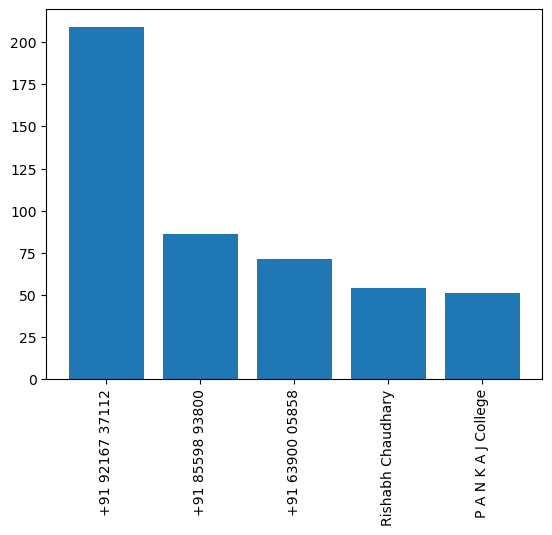

In [19]:
plt.bar(name,count)
plt.xticks(rotation='vertical')

In [17]:
round((df['user'].value_counts()/df.shape[0])*100,2).reset_index().rename(columns={'index':'name','user':'percent'})

,percent,count
0,+91 92167 37112,20.47
1,+91 85598 93800,8.42
2,+91 63900 05858,6.95
3,Rishabh Chaudhary,5.29
4,P A N K A J College,5.00
5,group_notification,4.80
6,+91 72399 59685,4.70
7,+91 80059 84565,4.51
8,+91 70858 39116,3.82
9,+91 92578 92694,3.43


In [22]:
words=[]
for message in temp['message']:
    for word in message.lower().split():
        if word not in stop_words:
            words.append(word)

In [40]:
df['message'].unique()

array(['Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.\n',
       '~\u202f✨AJAY SINGH ✨ created group "Section A (unofficial)"\n',
       'You were added\n',
       "+91 79830 61986 joined using this group's invite link\n",
       "+91 88245 37595 joined using this group's invite link\n",
       '~\u202fRavi Kumar Gupta added ~\u202f😇😇😇😇😇 and +91 91993 23709\n',
       "+91 96100 23020 joined using this group's invite link\n",
       '8.30 s hi lab hai\n', 'Kha aana hai\n', 'Basement m\n', 'Ok\n',
       "+91 70734 55143 joined using this group's invite link\n",
       '<Media omitted>\n', '~\u202fAbhishek Yadav added Rana\n',
       "+91 85598 93800 joined using this group's invite link\n",
       "+91 99291 18078 joined using this group's invite link\n",
       "+91 78780 68894 joined using this group's invite link\n",
       '10:30 se digital electronics ki class hai\n',
       "+91 93546 46

In [23]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(20))

,0,1
0,class,56
1,dsa,21
2,yrr,21
3,message,19
4,java,16
5,baat,16
6,😂,15
7,dena,14
8,lassi,14
9,mam,13


In [19]:
temp=df[df['user']!='group_notification']
temp=temp[temp['message']!='<Media omitted>\n']

In [20]:
temp=temp[temp['message']!='This message was deleted\n']

In [21]:
f=open('stop_hinglish.txt','r')
stop_words=f.read()
print(stop_words)

.
..
...
?
-
--
1
2
3
4
5
6
7
8
9
0
a
aadi
aaj
aap
aapne
aata
aati
aaya
aaye
ab
abbe
abbey
abe
abhi
able
about
above
accha
according
accordingly
acha
achcha
across
actually
after
afterwards
again
against
agar
ain
aint
ain't
aisa
aise
aisi
alag
all
allow
allows
almost
alone
along
already
also
although
always
am
among
amongst
an
and
andar
another
any
anybody
anyhow
anyone
anything
anyway
anyways
anywhere
ap
apan
apart
apna
apnaa
apne
apni
appear
are
aren
arent
aren't
around
arre
as
aside
ask
asking
at
aur
avum
aya
aye
baad
baar
bad
bahut
bana
banae
banai
banao
banaya
banaye
banayi
banda
bande
bandi
bane
bani
bas
bata
batao
bc
be
became
because
become
becomes
becoming
been
before
beforehand
behind
being
below
beside
besides
best
better
between
beyond
bhai
bheetar
bhi
bhitar
bht
bilkul
bohot
bol
bola
bole
boli
bolo
bolta
bolte
bolti
both
brief
bro
btw
but
by
came
can
cannot
cant
can't
cause
causes
certain
certainly
chahiye
chaiye
chal
chalega
chhaiye
clearly
c'mon
com
come
comes
could
coul

In [25]:
import emoji
import emoji.unicode_codes 
emojis=[]
for message in df['message']:
    emojis.extend([c for c in message if c in emoji.EMOJI_DATA])

In [26]:
pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))

,0,1
0,😂,27
1,😁,20
2,🤣,20
3,😇,10
4,✨,7
5,➕,7
6,🙏,6
7,🔊,5
8,👻,4
9,✅,4


In [27]:
df['month_num']=df['date'].dt.month

In [30]:
timeline=df.groupby(['year','month_num','month']).count()['message'].reset_index()

In [31]:
time=[]
for i in range(timeline.shape[0]):
    time.append(timeline['month'][i] + "-" + str(timeline['year'][i]))

In [32]:
timeline['time']=time

In [33]:
timeline

,year,month_num,month,message,time
0,2024,8,August,47,August-2024
1,2024,9,September,263,September-2024
2,2024,10,October,228,October-2024
3,2024,11,November,307,November-2024
4,2024,12,December,171,December-2024
5,2025,1,January,5,January-2025


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'August-2024'),
  Text(1, 0, 'September-2024'),
  Text(2, 0, 'October-2024'),
  Text(3, 0, 'November-2024'),
  Text(4, 0, 'December-2024'),
  Text(5, 0, 'January-2025')])

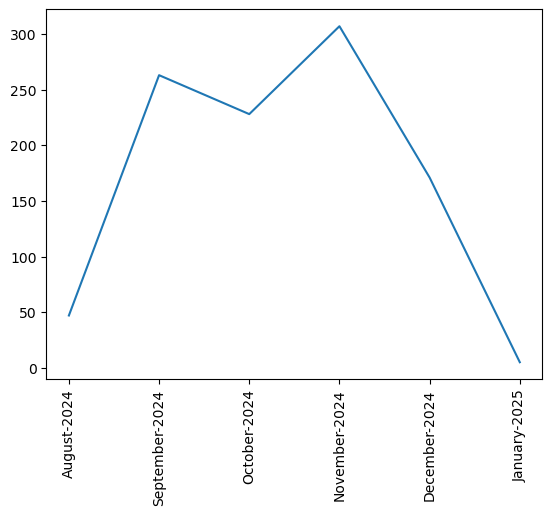

In [35]:
plt.plot(timeline['time'],timeline['message'])
plt.xticks(rotation='vertical')

In [37]:
df['only_date']=df['date'].dt.date
daily_timeline=df.groupby('only_date').count()['message'].reset_index()

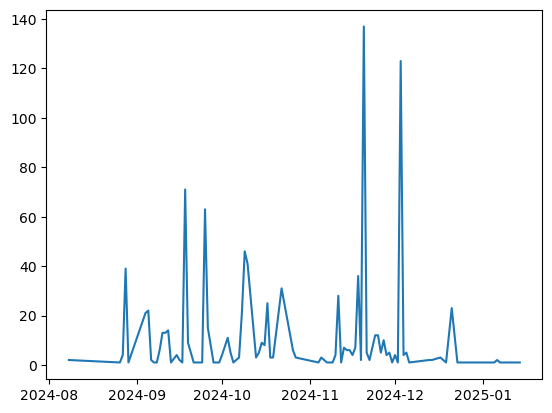

In [38]:
plt.plot(daily_timeline['only_date'],daily_timeline['message'])

In [39]:
df['day_name']=df['date'].dt.day_name()

In [40]:
df['day_name'].value_counts()

day_name
Wednesday    419
Tuesday      223
Thursday     163
Monday        99
Saturday      51
Sunday        39
Friday        27
Name: count, dtype: int64

In [42]:
period = []
for hour in df['hour']:
    if hour == 23:
        period.append(f"{hour}-00")
    elif hour == 0:
        period.append(f"00-{hour + 1:02d}")
    else:
        period.append(f"{hour:02d}-{hour + 1:02d}")


In [44]:
df['period']=period
df

,date,user,message,month,year,day,hour,minute,month_num,only_date,day_name,period
0,2024-08-26 23:39:00,group_notification,Messages and calls are end-to-end encrypted. N...,August,2024,26,23,39,8,2024-08-26,Monday,23-00
1,2024-08-08 15:24:00,group_notification,"~ ✨AJAY SINGH ✨ created group ""Section A (unof...",August,2024,8,15,24,8,2024-08-08,Thursday,15-16
2,2024-08-08 15:24:00,group_notification,You were added\n,August,2024,8,15,24,8,2024-08-08,Thursday,15-16
3,2024-08-27 09:34:00,group_notification,+91 79830 61986 joined using this group's invi...,August,2024,27,9,34,8,2024-08-27,Tuesday,09-10
4,2024-08-27 09:34:00,group_notification,+91 88245 37595 joined using this group's invi...,August,2024,27,9,34,8,2024-08-27,Tuesday,09-10
...,...,...,...,...,...,...,...,...,...,...,...,...
1016,2025-01-05 20:08:00,+91 92578 92694,<Media omitted>\n,January,2025,5,20,8,1,2025-01-05,Sunday,20-21
1017,2025-01-06 09:49:00,+91 70734 55143,Classes kab se start hogiii…???\n,January,2025,6,9,49,1,2025-01-06,Monday,09-10
1018,2025-01-06 10:10:00,+91 80059 84565,15 jan\n,January,2025,6,10,10,1,2025-01-06,Monday,10-11
1019,2025-01-07 10:22:00,+91 99291 18078,Re end term hogya ??\n,January,2025,7,10,22,1,2025-01-07,Tuesday,10-11


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0, 0.5, 'Friday'),
  Text(0, 1.5, 'Monday'),
  Text(0, 2.5, 'Saturday'),
  Text(0, 3.5, 'Sunday'),
  Text(0, 4.5, 'Thursday'),
  Text(0, 5.5, 'Tuesday'),
  Text(0, 6.5, 'Wednesday')])

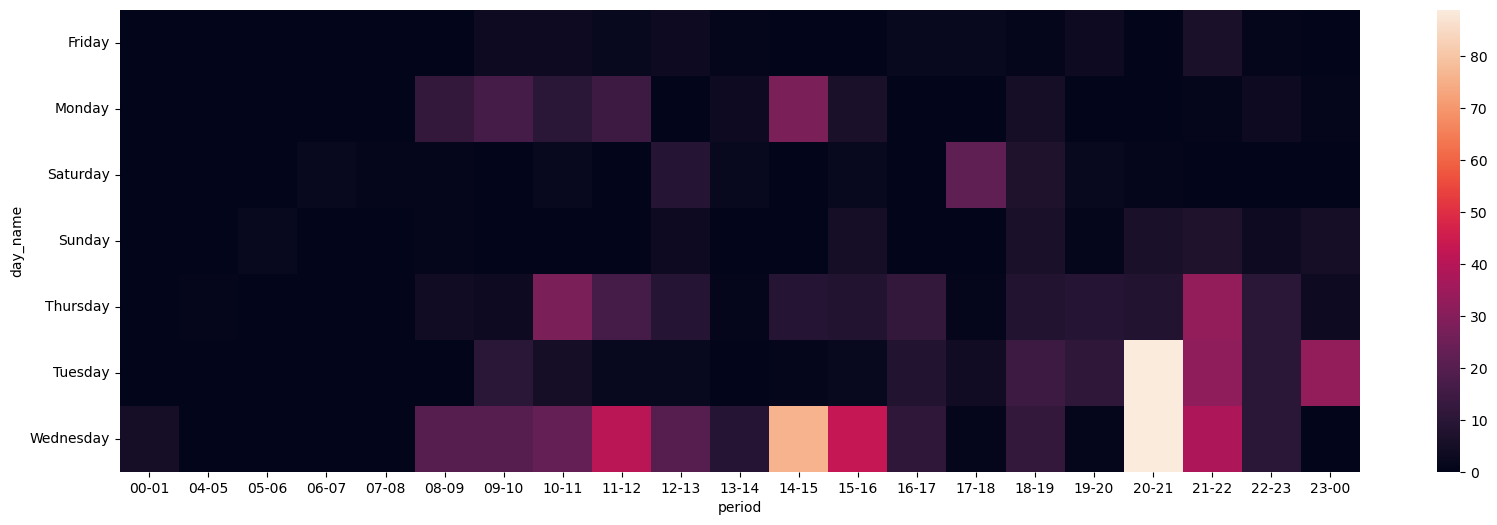

In [45]:
import seaborn as sns
plt.figure(figsize=(20,6))
sns.heatmap(df.pivot_table(index='day_name',columns='period',values='message',aggfunc='count').fillna(0))
plt.yticks(rotation='horizontal')